> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: TMDB Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In this report will analysis the data of TMDB Movies and understand trends associated with movie genres and production companies by asking 2 questions:
1. How the movie genre affect in revenues and popularity
2. Compersion for 2 Production compnies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas import DataFrame, Series

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
df = pd.read_csv("tmdb_5000_movies.csv")
df.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [4]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [5]:
df.drop(['overview','homepage','tagline'], axis = 1 , inplace = True)
df.head()

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124


In [6]:
df.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [7]:
release_date_null = df['release_date'].isnull()
df.loc[release_date_null]

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
4553,0,[],380097,[],en,America Is Still the Place,0.0,[],[],NaN,0,0.0,[],Released,America Is Still the Place,0.0,0


In [8]:
df['release_date'] = df['release_date'].fillna('2014-06-01')
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 17 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4803 non-null datetime64[ns]
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(4), object(9)
memory usage: 638.0+ KB


In [9]:
runtime_date_null = df['runtime'].isnull()
df.loc[runtime_date_null]

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,"To Be Frank, Sinatra at 100",0.0,0


In [10]:
value1 = {'runtime':98.0}
value2 = {'runtime':81.0}
df.fillna(value=value1, limit=1, inplace=True)
df.fillna(value=value2, limit=1, inplace=True)
df.loc[runtime_date_null]

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,98.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,81.0,[],Released,"To Be Frank, Sinatra at 100",0.0,0


In [11]:
df.shape

(4803, 17)

In [12]:
df.duplicated().sum()

0

In [13]:
df['genres'] = df['genres'].apply(json.loads)
def decode(column):
    z = []
    for i in column:
        z.append(i['name'])
    return ' '.join(z)
df['genres'] = df['genres'].apply(decode)
df.head(2)

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,Action Adventure Fantasy Science Fiction,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
1,300000000,Adventure Fantasy Action,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500


In [14]:
genres_list = set()
for i in df['genres'].str.split(' '):
    genres_list = set().union(i, genres_list)
    genres_list = list(genres_list)
    genres_list
genres_list.remove('')
genres_list

['Adventure',
 'Foreign',
 'Fiction',
 'Fantasy',
 'Romance',
 'Animation',
 'Movie',
 'TV',
 'History',
 'Mystery',
 'Comedy',
 'Documentary',
 'War',
 'Drama',
 'Music',
 'Thriller',
 'Crime',
 'Horror',
 'Western',
 'Family',
 'Action',
 'Science']

In [15]:
df['release_date'] = pd.to_datetime(df['release_date']).dt.year
columns = {'release_date':'year'}
df.rename(columns=columns, inplace=True)
df['year'].apply(int).head()

0    2009
1    2007
2    2015
3    2012
4    2012
Name: year, dtype: int64

In [16]:
df.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'popularity', 'production_companies',
       'production_countries', 'year', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [17]:
columns_order = ['id', 'popularity', 'budget', 'revenue', 'original_title', 'runtime', 'genres', 'production_companies',
        'year', 'vote_count', 'vote_average']
        
df= df.reindex(columns = columns_order)

In [18]:
df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,production_companies,year,vote_count,vote_average
0,19995,150.437577,237000000,2787965087,Avatar,162.0,Action Adventure Fantasy Science Fiction,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009,11800,7.2
1,285,139.082615,300000000,961000000,Pirates of the Caribbean: At World's End,169.0,Adventure Fantasy Action,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007,4500,6.9
2,206647,107.376788,245000000,880674609,Spectre,148.0,Action Adventure Crime,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015,4466,6.3
3,49026,112.312950,250000000,1084939099,The Dark Knight Rises,165.0,Action Crime Drama Thriller,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012,9106,7.6
4,49529,43.926995,260000000,284139100,John Carter,132.0,Action Adventure Science Fiction,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012,2124,6.1


In [19]:
df[df['revenue']==0]

,id,popularity,budget,revenue,original_title,runtime,genres,production_companies,year,vote_count,vote_average
83,79698,2.418535,27000000,0,The Lovers,109.0,Action Adventure Science Fiction Romance,"[{""name"": ""Corsan"", ""id"": 7299}, {""name"": ""Bli...",2015,34,4.8
135,7978,21.214571,150000000,0,The Wolfman,102.0,Drama Horror Thriller,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",2010,549,5.5
265,10588,18.251129,0,0,The Cat in the Hat,82.0,Comedy Fantasy Family,"[{""name"": ""Imagine Entertainment"", ""id"": 23}, ...",2003,366,4.9
309,10214,17.815595,84000000,0,Son of the Mask,94.0,Fantasy Comedy Family Adventure,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...",2005,338,3.6
376,10357,19.836124,90000000,0,Volcano,104.0,Science Fiction Action Drama Thriller,"[{""name"": ""Twentieth Century Fox Film Corporat...",1997,376,5.2
406,51052,19.836830,0,0,Arthur Christmas,97.0,Drama Animation Family Comedy,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2011,333,6.7
433,146216,44.343330,84000000,0,RED 2,116.0,Action Comedy Crime Thriller,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""D...",2013,1526,6.4
453,12096,25.450534,0,0,The Pink Panther,93.0,Action Comedy Crime Mystery Family,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2006,550,5.6
463,161795,0.605645,0,0,Déjà Vu,117.0,Romance Drama,"[{""name"": ""Rainbow Film Company, The"", ""id"": 2...",1998,1,8.0
467,9822,6.643778,90000000,0,Mighty Joe Young,114.0,Action Adventure Family Fantasy,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",1998,208,5.9


In [20]:
df[df['budget']==0]

,id,popularity,budget,revenue,original_title,runtime,genres,production_companies,year,vote_count,vote_average
265,10588,18.251129,0,0,The Cat in the Hat,82.0,Comedy Fantasy Family,"[{""name"": ""Imagine Entertainment"", ""id"": 23}, ...",2003,366,4.9
321,77953,16.460356,0,104907746,The Campaign,85.0,Comedy,"[{""name"": ""Everyman Pictures"", ""id"": 2242}, {""...",2012,578,5.6
359,258509,27.867368,0,233755553,Alvin and the Chipmunks: The Road Chip,92.0,Adventure Animation Comedy Family,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...",2015,428,5.8
406,51052,19.836830,0,0,Arthur Christmas,97.0,Drama Animation Family Comedy,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2011,333,6.7
409,16858,5.159407,0,37823676,All That Jazz,123.0,Drama Music,"[{""name"": ""Twentieth Century Fox Film Corporat...",1979,85,7.3
453,12096,25.450534,0,0,The Pink Panther,93.0,Action Comedy Crime Mystery Family,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2006,550,5.6
463,161795,0.605645,0,0,Déjà Vu,117.0,Romance Drama,"[{""name"": ""Rainbow Film Company, The"", ""id"": 2...",1998,1,8.0
474,330770,3.300061,0,0,Évolution,81.0,Mystery Drama Horror,"[{""name"": ""Ex Nihilo"", ""id"": 3307}, {""name"": ""...",2015,47,6.4
475,9433,20.632673,0,43312294,The Edge,117.0,Action Adventure Drama,"[{""name"": ""Art Linson Productions"", ""id"": 8769}]",1997,349,6.7
489,36970,10.706613,0,19406406,Oceans,84.0,Documentary Family,"[{""name"": ""Path\u00e9 Films"", ""id"": 4959}, {""n...",2009,111,7.3


In [21]:
df.drop(df[df['revenue']==0].index,inplace=True)
df.drop(df[df['budget']==0].index,inplace=True)
df.shape

(3229, 11)

In [22]:
df['main_genre']=df.genres.str.split(' ').apply(lambda x: x[0])
df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,production_companies,year,vote_count,vote_average,main_genre
0,19995,150.437577,237000000,2787965087,Avatar,162.0,Action Adventure Fantasy Science Fiction,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009,11800,7.2,Action
1,285,139.082615,300000000,961000000,Pirates of the Caribbean: At World's End,169.0,Adventure Fantasy Action,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007,4500,6.9,Adventure
2,206647,107.376788,245000000,880674609,Spectre,148.0,Action Adventure Crime,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015,4466,6.3,Action
3,49026,112.312950,250000000,1084939099,The Dark Knight Rises,165.0,Action Crime Drama Thriller,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012,9106,7.6,Action
4,49529,43.926995,260000000,284139100,John Carter,132.0,Action Adventure Science Fiction,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012,2124,6.1,Action


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (How the movie genre affect in revenue and popularity)

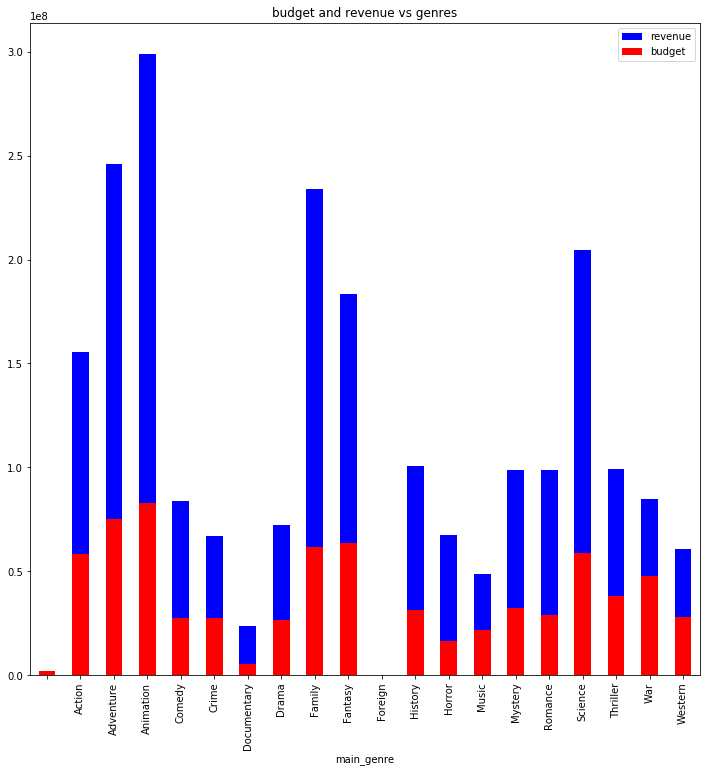

In [46]:
x = df.groupby('main_genre').revenue.mean().plot(figsize=(12,12),title='budget and revenue vs genres',kind="bar",color='blue')
df.groupby('main_genre').budget.mean().plot(kind='bar',color='red');
plt.legend()

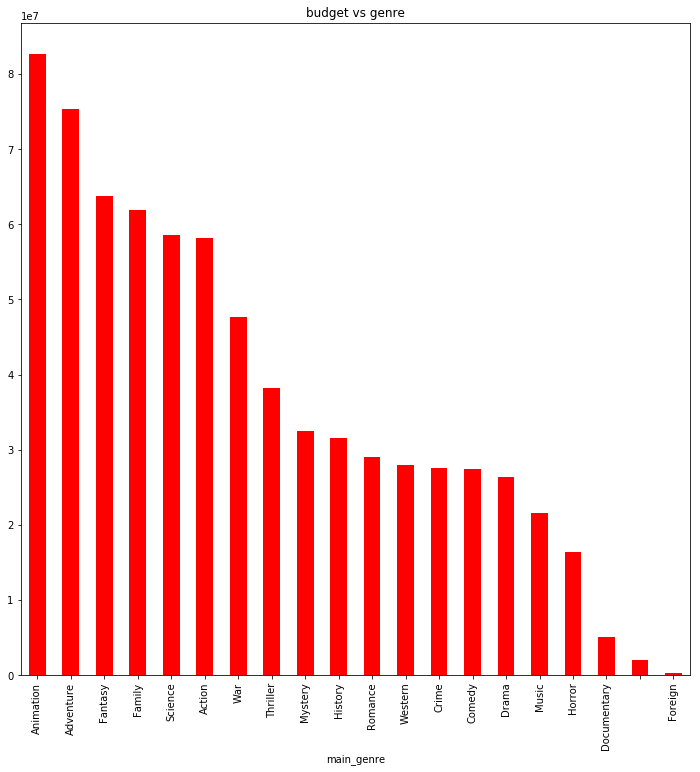

In [24]:
x = df.groupby('main_genre').budget.mean().sort_values(ascending=False).plot(figsize=(12,12),title='budget vs genre',kind="bar",color='red')

In [25]:
df['profit']= df['revenue']-df['budget']
df.head(1)

,id,popularity,budget,revenue,original_title,runtime,genres,production_companies,year,vote_count,vote_average,main_genre,profit
0,19995,150.437577,237000000,2787965087,Avatar,162.0,Action Adventure Fantasy Science Fiction,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009,11800,7.2,Action,2550965087


In [26]:
df.groupby('main_genre').profit.mean()

main_genre
              -3.272700e+05
Action         9.732282e+07
Adventure      1.707187e+08
Animation      2.162605e+08
Comedy         5.621024e+07
Crime          3.916666e+07
Documentary    1.867026e+07
Drama          4.606443e+07
Family         1.722063e+08
Fantasy        1.196426e+08
Foreign       -1.137000e+05
History        6.921722e+07
Horror         5.094192e+07
Music          2.699556e+07
Mystery        6.598520e+07
Romance        6.988704e+07
Science        1.461393e+08
Thriller       6.087310e+07
War            3.721997e+07
Western        3.293069e+07
Name: profit, dtype: float64

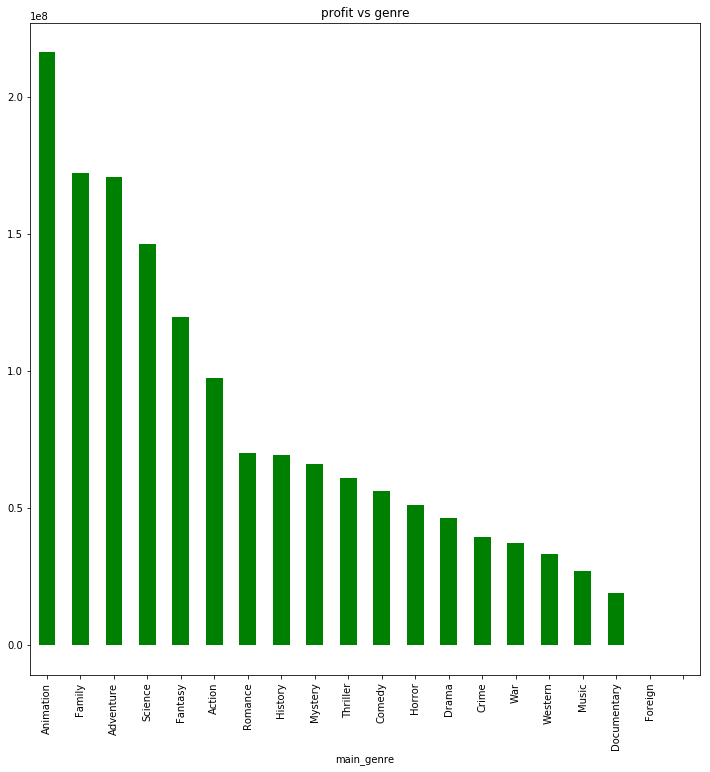

In [27]:
x = df.groupby('main_genre').profit.mean().sort_values(ascending=False).plot(figsize=(12,12),title='profit vs genre',kind="bar",color='green')

In [28]:
df.groupby('main_genre').agg(np.mean)

,id,popularity,budget,revenue,runtime,year,vote_count,vote_average,profit
main_genre,,,,,,,,,
,48382.000000,0.031947,2.000000e+06,1.672730e+06,120.000000,2003.000000,2.000000,5.000000,-3.272700e+05
Action,46074.664966,34.633887,5.821985e+07,1.555427e+08,111.370748,2002.238095,1279.258503,6.069728,9.732282e+07
Adventure,31329.597222,44.599512,7.536576e+07,2.460844e+08,115.576389,1999.631944,1680.517361,6.389583,1.707187e+08
Animation,53102.555556,41.694431,8.268113e+07,2.989416e+08,91.272727,2005.414141,1608.696970,6.374747,2.162605e+08
Comedy,42081.206625,20.315653,2.744452e+07,8.365476e+07,102.687697,2002.651420,606.895899,6.061830,5.621024e+07
Crime,46877.262411,25.189736,2.756097e+07,6.672764e+07,116.482270,2001.127660,822.936170,6.637589,3.916666e+07
Documentary,36448.466667,6.597160,5.131509e+06,2.380177e+07,98.600000,2005.800000,135.066667,6.843333,1.867026e+07
Drama,43866.931727,22.500028,2.636095e+07,7.242538e+07,120.560910,2000.546185,725.124498,6.661714,4.606443e+07
Family,63975.157895,51.962638,6.185526e+07,2.340616e+08,94.157895,2005.078947,1104.368421,6.139474,1.722063e+08


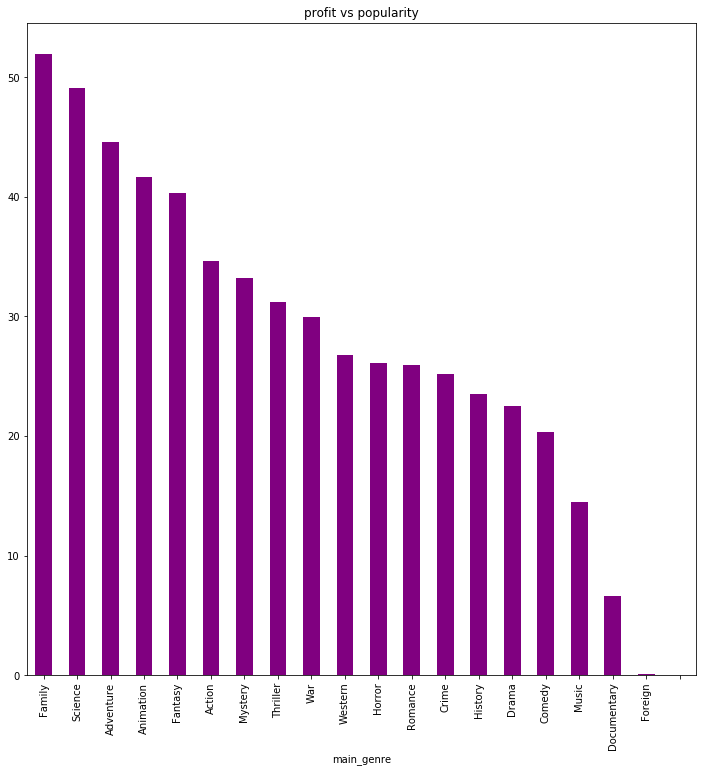

In [37]:
x = df.groupby('main_genre').popularity.mean().sort_values(ascending=False).plot(figsize=(12,12),title='profit vs popularity',kind="bar",color='purple')

### Research Question 2  (Compersion for 2 production companies)

In [30]:
df['production_companies'] = df['production_companies'].apply(json.loads)
def decode(column):
    z = []
    for i in column:
        z.append(i['name'])
    return ' '.join(z)
df['production_companies'] = df['production_companies'].apply(decode)
df.head(2)

,id,popularity,budget,revenue,original_title,runtime,genres,production_companies,year,vote_count,vote_average,main_genre,profit
0,19995,150.437577,237000000,2787965087,Avatar,162.0,Action Adventure Fantasy Science Fiction,Ingenious Film Partners Twentieth Century Fox ...,2009,11800,7.2,Action,2550965087
1,285,139.082615,300000000,961000000,Pirates of the Caribbean: At World's End,169.0,Adventure Fantasy Action,Walt Disney Pictures Jerry Bruckheimer Films S...,2007,4500,6.9,Adventure,661000000


In [31]:
df['DC Comics'] = df['production_companies'].str.contains('DC Comics').apply(lambda x:1 if x else 0)
df['Marvel Studios'] = df['production_companies'].str.contains('Marvel Studios').apply(lambda x:1 if x else 0)

In [32]:
a = df['DC Comics'].sum()
b = df['Marvel Studios'].sum()
dict_company = {'DC':a, 'Marvel':b}
company_vs = Series(dict_company)
company_vs

DC        12
Marvel    13
dtype: int64

Text(0.5,1,'DC Comis vs Marvel Studios')

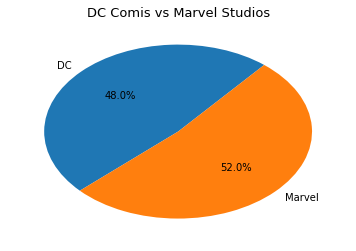

In [33]:
company_vs.plot(kind='pie', label='', startangle=50, shadow=False, autopct='%1.1f%%')
plt.title("DC Comis vs Marvel Studios",fontsize=13)

In [34]:
companydf = df[['DC Comics','Marvel Studios']]
companydf.index = df['year']

companydf = companydf.groupby('year').sum()
companydf.tail()

,DC Comics,Marvel Studios
year,,
2012,0,1
2013,0,2
2014,1,2
2015,0,2
2016,2,1


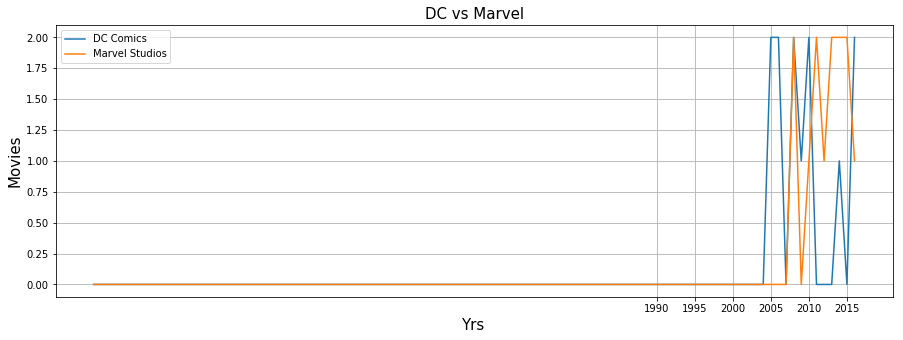

In [35]:
plt.figure(figsize=(15,5))
plt.plot(companydf, label=companydf.columns)
plt.xticks(range(1990,2018,5))
plt.legend(companydf)
plt.title("DC vs Marvel", fontsize=15)
plt.xlabel('Yrs', fontsize = 15)
plt.ylabel("Movies",fontsize=15)
plt.grid(True)
plt.show()

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

We can find the following:
1. Movie genres that has low budget production and high revenues is: Animation, Adventure, and Family. which is conclude that these geners is very good and profitable to invest in.
2. The most expensive budget production genres is: Animation, Adventure, and Fantasy. While the most profitable genres is: Animation, Family, and Adventure.
3. The most popular genres is: Family, Science, and Adventure. which is conclude that the popular genre doesn't mean is proftiable.
4. Movie genres that has high investment risk and low popularity is: Foreign.
5. Comparing 2 famous productions compnies are DC Comics and Marvel, we can find that Marvel has higher trend in movies production than DC Comics. Marel produced more Movies than DC Comics. 

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [36]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0